In [18]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
#from statsmodels.tsa.stattools import acf, pacf 
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.seasonal import seasonal_decompose



## Object

In [19]:
obj="mrk421"

# Radio

In [129]:
#luz="radio"
#path = "../"+luz+"/ts/"
#labelleft= "Flux Density (Jy)"
#instr = " OVRO/RADIO 40m "
#data = pd.read_table(path+"data/"+obj+".csv", sep=",", comment='#')

# Óptico

In [168]:
#path = "../optical/ts/"
#labelleft= "Magnitude"
#instr = " AAVSO "
#data = pd.read_table(path+"data/optical.dat", sep="\s+", comment='#')

# X-rays

In [34]:
#luz="x-rays"
#path = "../x-rays/"
#labelleft= "Count Rate (0.3-10 keV)(c/s)"
#instr = " SWIFT "
#data = pd.read_table("../x-rays/curve.dat", sep="\s+", comment='#', usecols=(0,3,4),nrows=160329)

# Gamma

In [41]:
luz="gamma"
path = "../"+luz+"/"
labelleft= "photons/cm^2/s"
instr = " FERMI "
data = pd.read_table("../gamma/mrk421.dat", sep="\s+", comment='#')

In [42]:
data.columns = ['MJD', 'Flux', 'Err']
ts = data["Flux"]
date = data["MJD"]

In [43]:
data.sort_values(["MJD"], axis=0, ascending=True, inplace=True)


In [48]:
#mediana=data.median()
#media=data.mean()
#maximo=data.max()
#minimo=data.min()
#desv=data.std()

legenda_mediana="Median="+str(mediana[1])
legenda_media="Mean="+str(media[1])
legenda_max="Max="+str(maximo[1])
legenda_min="Min="+str(minimo[1])
legenda_desv="Stan. Desv. ="+str(desv[1])
bines=data.shape[0]//2

#fig, ax = plt.subplots()
#plt.tick_params(axis='both', which='major', labelsize=24)

data.hist(bins=bines, column=['Flux'], ax=ax)
ax.set_title("Histogram"+instr+obj, fontsize=24)
ax.set_ylabel('Absolute Frecuency', fontsize=24)
ax.set_xlabel('Flux Density (Jy)', fontsize=24)


ax.text(0.8, 19.5, legenda_mediana, fontsize=24)
ax.text(0.8, 19, legenda_media, fontsize=24)
ax.text(0.8, 18.5, legenda_max, fontsize=24)
ax.text(0.8, 18, legenda_min, fontsize=24)
ax.text(0.8, 17.5, legenda_desv, fontsize=24)

#fig.savefig(path+obj+"_hist.png")

In [44]:
ts_EWM = ts.ewm(adjust=False,alpha=0.1).mean()

In [47]:
#ts.shape
data["Flux"]

0       9.906150e-08
1       1.442000e-07
2       1.854420e-07
3       8.505210e-08
4       1.329740e-07
            ...     
4123    2.323490e-07
4124    2.869030e-08
4125    5.212150e-08
4126    1.073130e-07
4127    5.670130e-08
Name: Flux, Length: 4128, dtype: float64

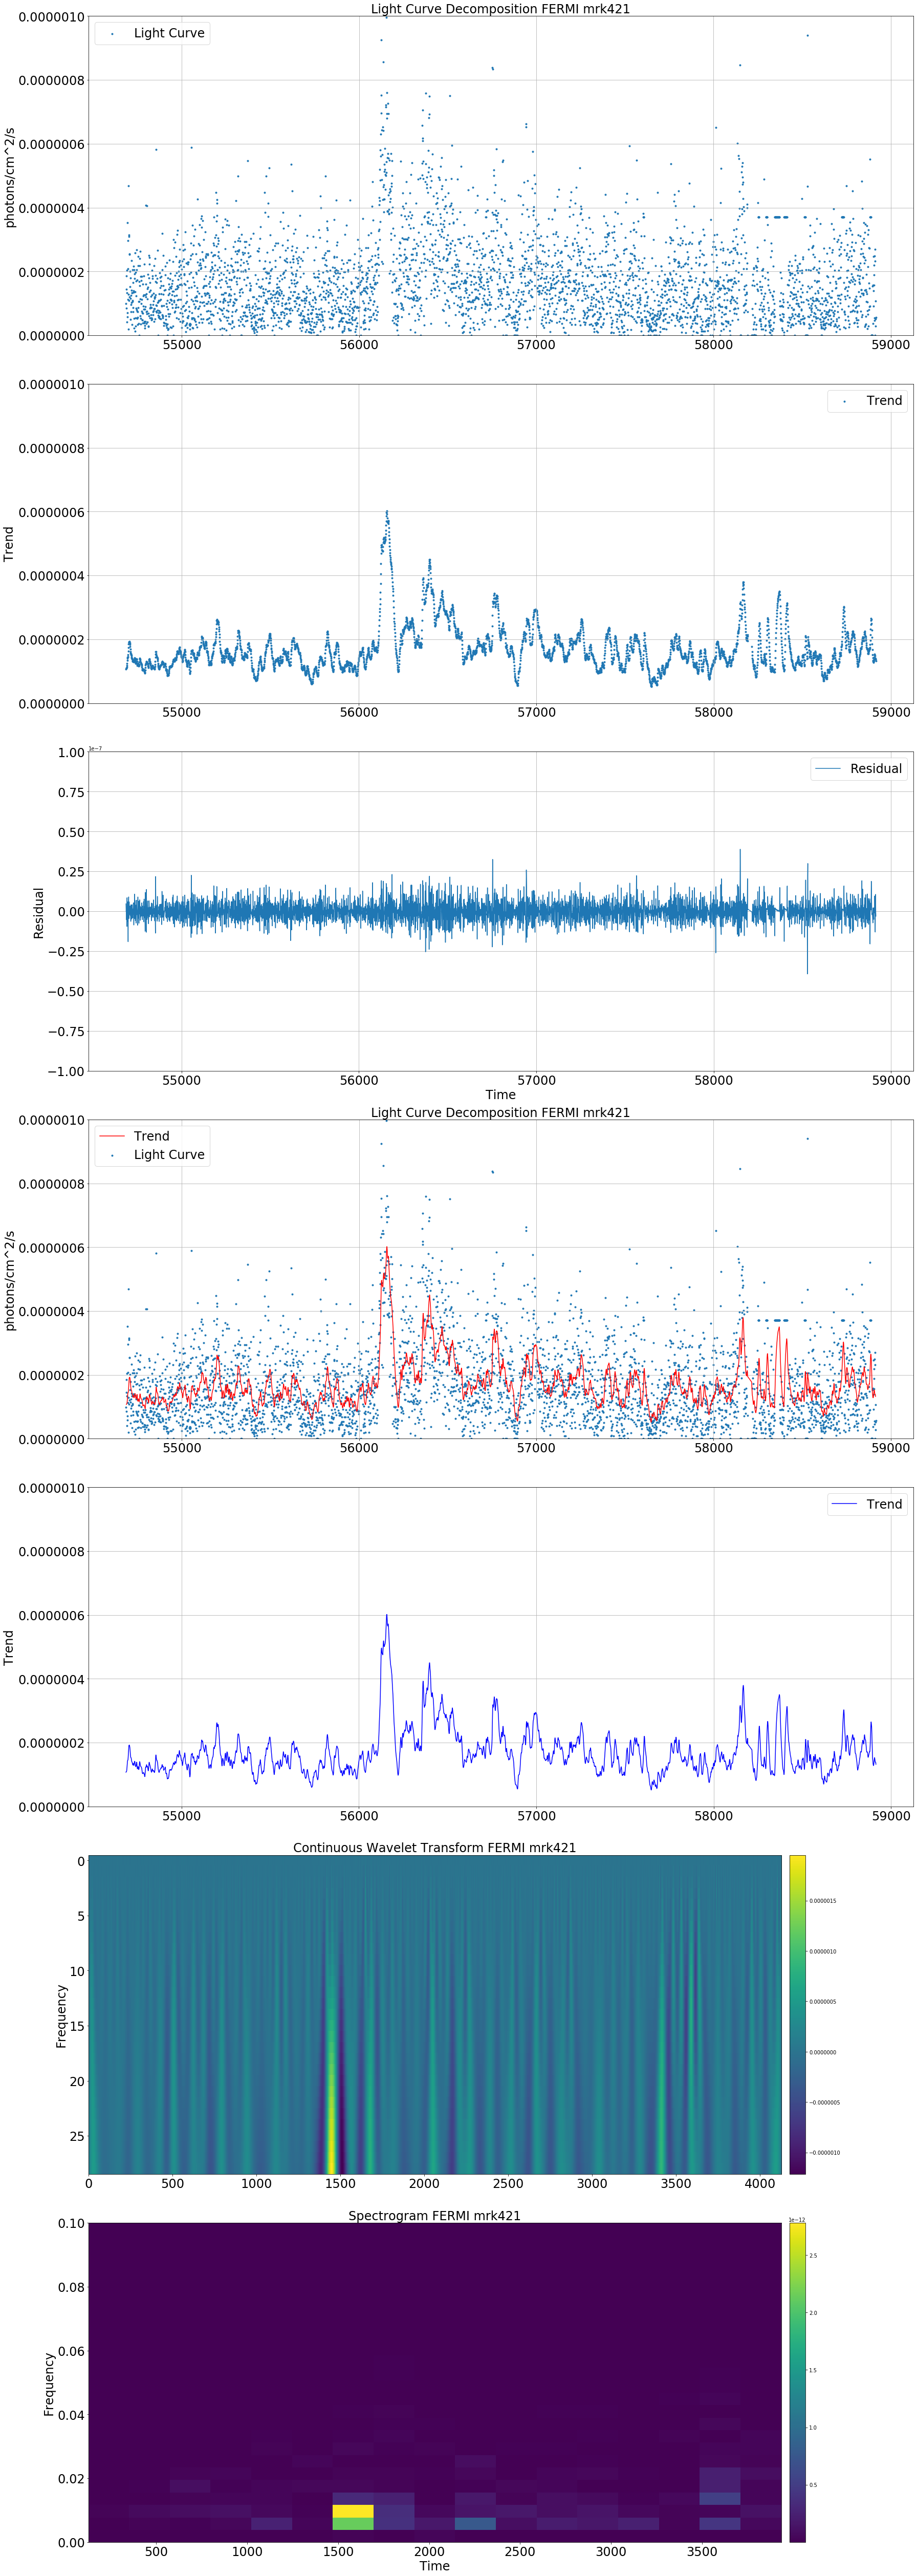

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal

widths = np.arange(1,30)
cwtmatr = signal.cwt(ts_EWM, signal.ricker, widths)
rcParams['figure.figsize'] = 25, 70


decomposition = seasonal_decompose(ts_EWM,freq=4)

#plt.title("Autocorrelation OVRO/RADIO 40m mrk421", fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(711)
plt.tick_params(axis='both', which='major', labelsize=24)
#plt.ylabel('Count Rate (keV)(c/s)', fontsize=24)
plt.ylabel(labelleft, fontsize=24)
###########GAMMA#######
plt.ylim(0,1e-6)
######################
#fig, ax = plt.subplots()
plt.title('Light Curve Decomposition'+instr+obj, fontsize=24)
#plt.plot(ts, label='Light Curve', marker='.', linewidth=0, markersize=4,color="blue")
plt.scatter(data['MJD'], data['Flux'], label='Light Curve',marker='.')
#plt.plot(data['MJD'], trend, label='Trend', color="red")
#plt.plot(data['MJD'], data['Flux'], label='Light Curve', linewidth=0, markersize=4,color="red" )
#ts.plot(x=date)
#plt.plot(ts_EWM,color="blue")
plt.legend(loc='best', fontsize=24)
plt.grid()

plt.subplot(712)
plt.tick_params(axis='both', which='major', labelsize=24)
################GAMMA#########
plt.ylim(0,1e-6)
###########################
plt.ylabel('Trend', fontsize=24)
plt.scatter(data['MJD'], trend, label='Trend', marker=".")
#plt.plot(data['MJD'], trend, label='Trend', color="red")
plt.legend(loc='best', fontsize=24)
plt.grid()

plt.subplot(713)

plt.tick_params(axis='both', which='major', labelsize=24)
plt.ylabel('Residual', fontsize=24)
##############GAMMA###############
plt.ylim(-1e-7,1e-7)
###########################
plt.plot(data['MJD'],residual, label='Residual')
#plt.scatter(data['MJD'], residual, label='Residual')
plt.legend(loc='best', fontsize=24)
plt.xlabel('Time', fontsize=24)
plt.grid()


plt.subplot(714)

plt.tick_params(axis='both', which='major', labelsize=24)
#plt.ylabel('Count Rate (keV)(c/s)', fontsize=24)
plt.ylabel(labelleft, fontsize=24)
##################GAMMA##########
plt.ylim(0,1e-6)
#########################
#fig, ax = plt.subplots()
plt.title('Light Curve Decomposition'+instr+obj, fontsize=24)
#plt.plot(ts_EWM, label='Light Curve', marker='.', linewidth=0, markersize=4,color="blue")
plt.scatter(data['MJD'], data['Flux'], label='Light Curve',marker='.')
plt.plot(data['MJD'], trend, label='Trend', color="red")
#plt.plot(data['MJD'], data['Flux'], label='Light Curve', linewidth=0, markersize=4,color="red" )
#ts.plot(x=date)
#plt.plot(ts_EWM,color="blue")
plt.legend(loc='best', fontsize=24)
plt.grid()

plt.subplot(715)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.ylabel('Trend', fontsize=24)
#################GAMMA##############
plt.ylim(0,1e-6)
#############################
#plt.scatter(data['MJD'], trend, label='Trend')
plt.plot(data['MJD'], trend, label='Trend', color="blue")
plt.legend(loc='best', fontsize=24)
plt.grid()

#plt.subplot(413)
#plt.tick_params(axis='both', which='major', labelsize=24)
#plt.ylabel('Seasonal', fontsize=24)
#plt.plot(seasonal,label='Seasonal')
#plt.legend(loc='best', fontsize=24)

plt.subplot(716)
plt.tick_params(axis='both', which='major', labelsize=24)
#plt.plot(ts_EWM)
plt.title('Continuous Wavelet Transform'+instr+obj, fontsize=24)
#plt.imshow(cwtmatr, cmap='plasma', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
#plt.imshow(cwtmatr, cmap='plasma', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.imshow(cwtmatr, aspect='auto')

#plt.colorbar(orientation="horizontal", pad=-0.2, shrink=0.2)
plt.colorbar(pad=0.01)
plt.ylabel('Frequency', fontsize=24)


plt.subplot(717)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.title('Spectrogram'+instr+obj, fontsize=24)
#f, t, Sxx = signal.spectrogram(ts_EWM, return_onesided=False)
f, t, Sxx = signal.spectrogram(ts_EWM)
plt.pcolormesh(t, f, Sxx)
plt.axis([t.min(), t.max(), f.min(),0.1])

plt.colorbar(pad=0.01)
plt.ylabel('Frequency', fontsize=24)
plt.xlabel('Time', fontsize=24)
#plt.savefig(path+"/images/radio_spectrum_"+obj+".png")

plt.tight_layout()
#plt.savefig("../gamma/mrk421_gamma_seasonal.png")
#plt.savefig("../x-rays/mrk421_x-rays_seasonal.png")
plt.savefig(path+"/ts/images/"+luz+"_lcs_"+obj+".png")

Text(0, 0.5, 'Corretation')

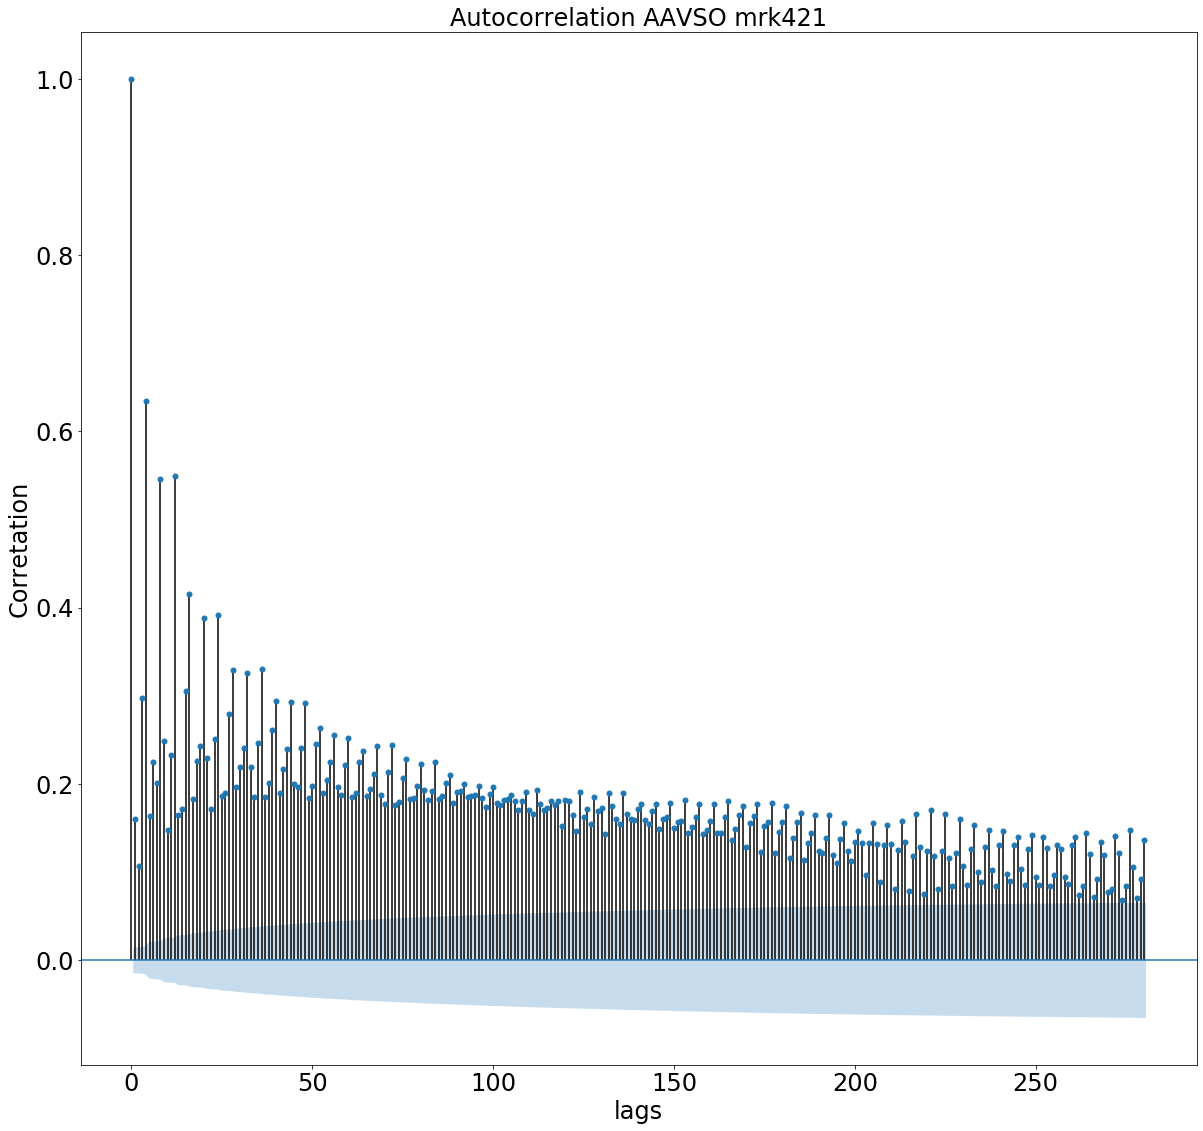

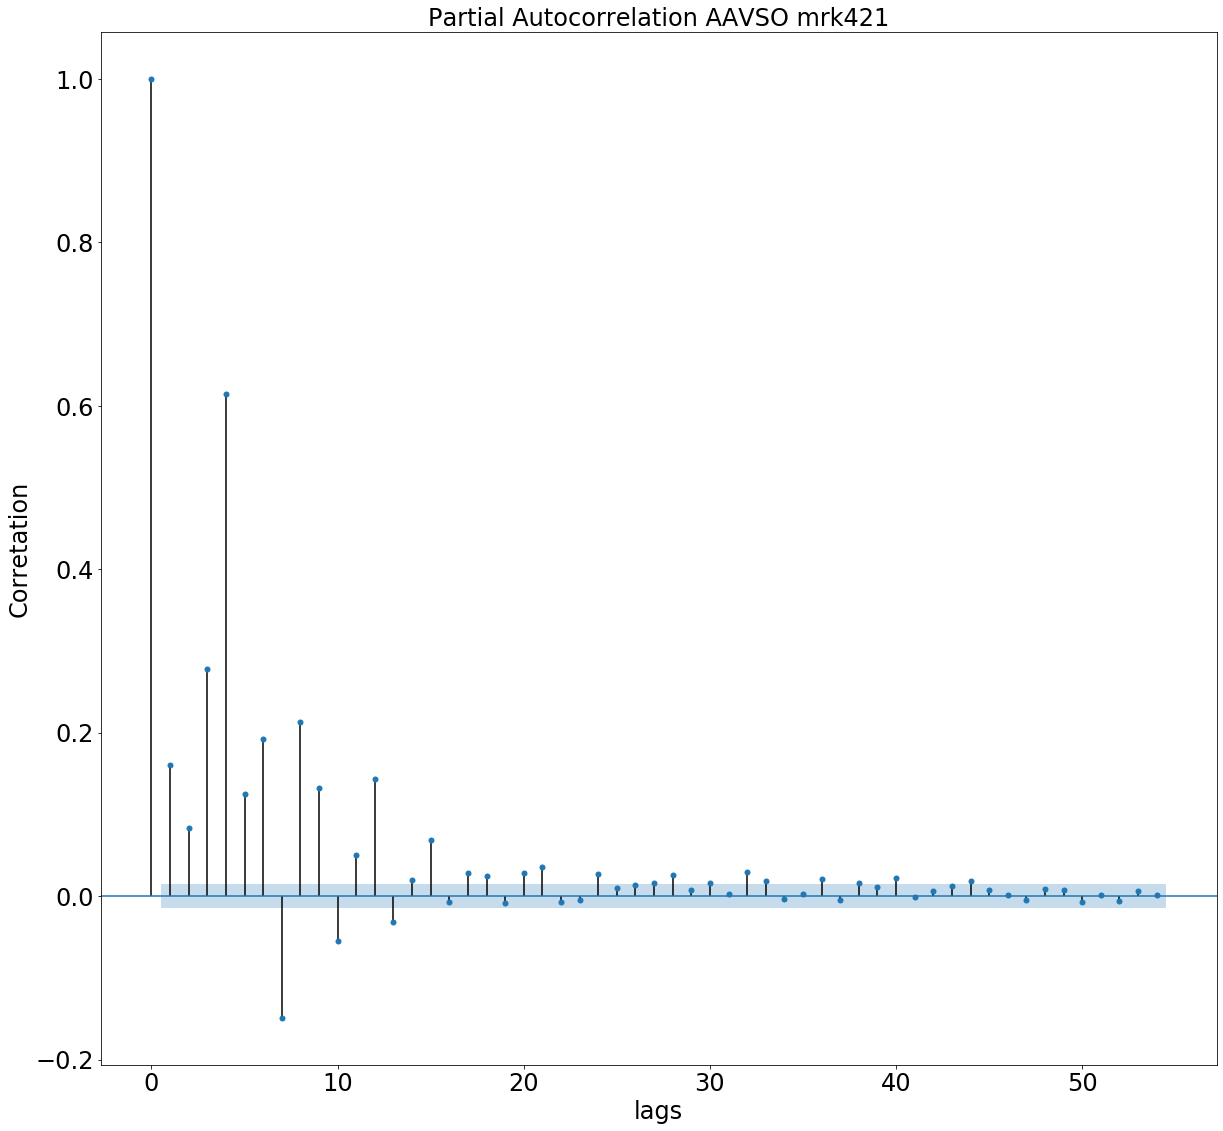

In [171]:
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#54812-54473
#339 días
rcParams['figure.figsize'] = 20, 19

plot_acf(ts, lags=280, fft=True, alpha=.05)
#plot_acf(ts_EWM)
plt.title("Autocorrelation"+instr+obj, fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xlabel("lags", fontsize=24)
plt.ylabel("Corretation", fontsize=24)


#new_ts_EWM = np.delete(ts_EWM, slice(0,5),0)
plot_pacf(ts, lags=54, alpha=.05)
plt.title("Partial Autocorrelation"+instr+obj, fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xlabel("lags", fontsize=24)
plt.ylabel("Corretation", fontsize=24)
#plt.xlim=(50, 550)

#plt.savefig(path+"/images/radio_pacf_"+obj+".png")
#plt.savefig(path+"/images/radio_acf_"+obj+".png")

Text(0.5, 0, 'Time')

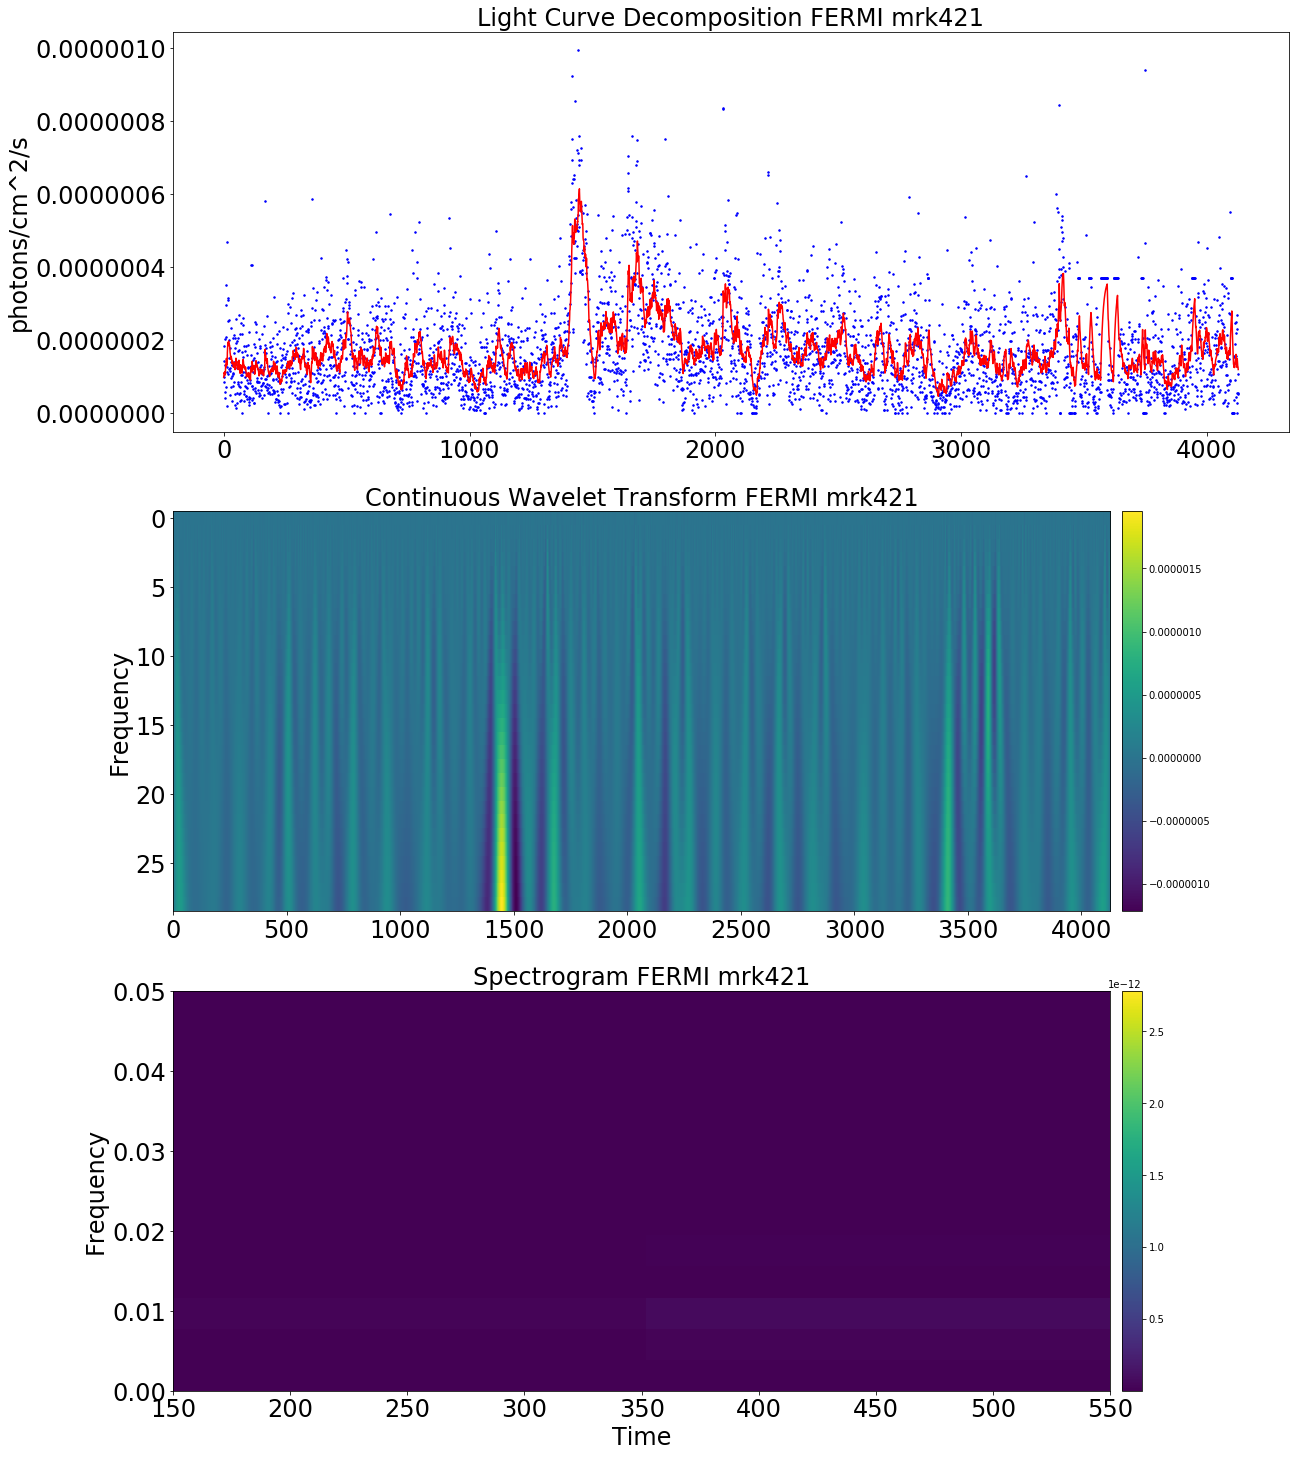

In [28]:
from scipy import signal
rcParams['figure.figsize'] = 20, 25
widths = np.arange(1,30)
cwtmatr = signal.cwt(ts_EWM, signal.ricker, widths)


#plt.scatter(data['MJD'], data['Flux'], label='Light Curve',marker='.')
#plt.plot(data['MJD'], data['Flux'], label='Light Curve', linewidth=0, markersize=4,color="red" )




plt.subplot(311)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.ylabel(labelleft, fontsize=24)
plt.title('Light Curve Decomposition'+instr+obj, fontsize=24)
plt.plot(ts, marker='.', linewidth=0, markersize=3, color="blue")
#plt.scatter(data['MJD'], data['Flux'], label='Light Curve',marker='.')
plt.plot(ts_EWM,color="red")
#ts = data["Flux"]

plt.subplot(312)
plt.tick_params(axis='both', which='major', labelsize=24)
#plt.plot(ts_EWM)
plt.title('Continuous Wavelet Transform'+instr+obj, fontsize=24)
plt.imshow(cwtmatr,aspect='auto')
#plt.colorbar(orientation="horizontal", pad=-0.2, shrink=0.2)
plt.colorbar(pad=0.01)
plt.ylabel('Frequency', fontsize=24)


plt.subplot(313)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.title('Spectrogram'+instr+obj, fontsize=24)
#f, t, Sxx = signal.spectrogram(ts_EWM, return_onesided=False)
f, t, Sxx = signal.spectrogram(ts_EWM)
plt.pcolormesh(t, f, Sxx)
plt.axis([150, 550, 0, 0.05])
#plt.axis([120, 3900, 0, 0.01])
plt.colorbar(pad=0.01)
plt.ylabel('Frequency', fontsize=24)
plt.xlabel('Time', fontsize=24)
#plt.savefig(path+"/images/x-rays_spectrum_"+obj+".png")


In [59]:
ts_EWM = ts.ewm(adjust=False,alpha=0.1).mean()

#fig1, ax1 = plt.subplots()
ax1.set_ylabel('Flux Density (Jy)')
ax1.set_xlabel('Observations')
ax1.set_title("Exponentially Weighted Moving Average OVRO/RADIO 40m mrk421")
#plt.plot(ts_EWM,color="blue")


NameError: name 'ax1' is not defined

In [138]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determinar estadísticas móviles
    rolmean = timeseries.rolling(window=12,center=True).mean()
    rolstd = timeseries.rolling(window=12,center=True).std()

    # Graficar estadísticas móviles#luz="radio"
    orig = plt.plot(timeseries, color='blue',label='Serie de tiempo')
    mean = plt.plot(rolmean, color='red', label='Media móvil')
    std = plt.plot(rolstd, color='black', label = 'Desv. est. móvil')
    plt.legend(loc='best', fontsize=24)
    

      
    plt.title('Serie de tiempo con media y desv. est. móviles', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=24)
    plt.show(block=False)
    
    # Realizar prueba Dicket-Fuller
    dftest = adfuller(timeseries, autolag='AIC')
    tstat = dftest[0]; pvalue = dftest[1]; cvalues = dftest[4]
    print('Resultado de la prueba Dickey-Fuller')
    print("------------------")
    print("Estadística de prueba\t",tstat)
    print("p-value\t\t\t",pvalue)
    print("------------------")
    print("Valores críticos (la estadística de prueba debe ser MENOR)")
    for clevel in [10,5,1]:
        conf = 100-clevel
        cval = cvalues['%i%%' % clevel]
        if tstat < cval:
            comp = ">"
            verdict = "PASA"
        else:
            comp = "<"
            verdict = "FALLA"        
        print("Confianza %i%%\t\t%f %s %f ... %s" % (conf, cval, comp, tstat, verdict))   

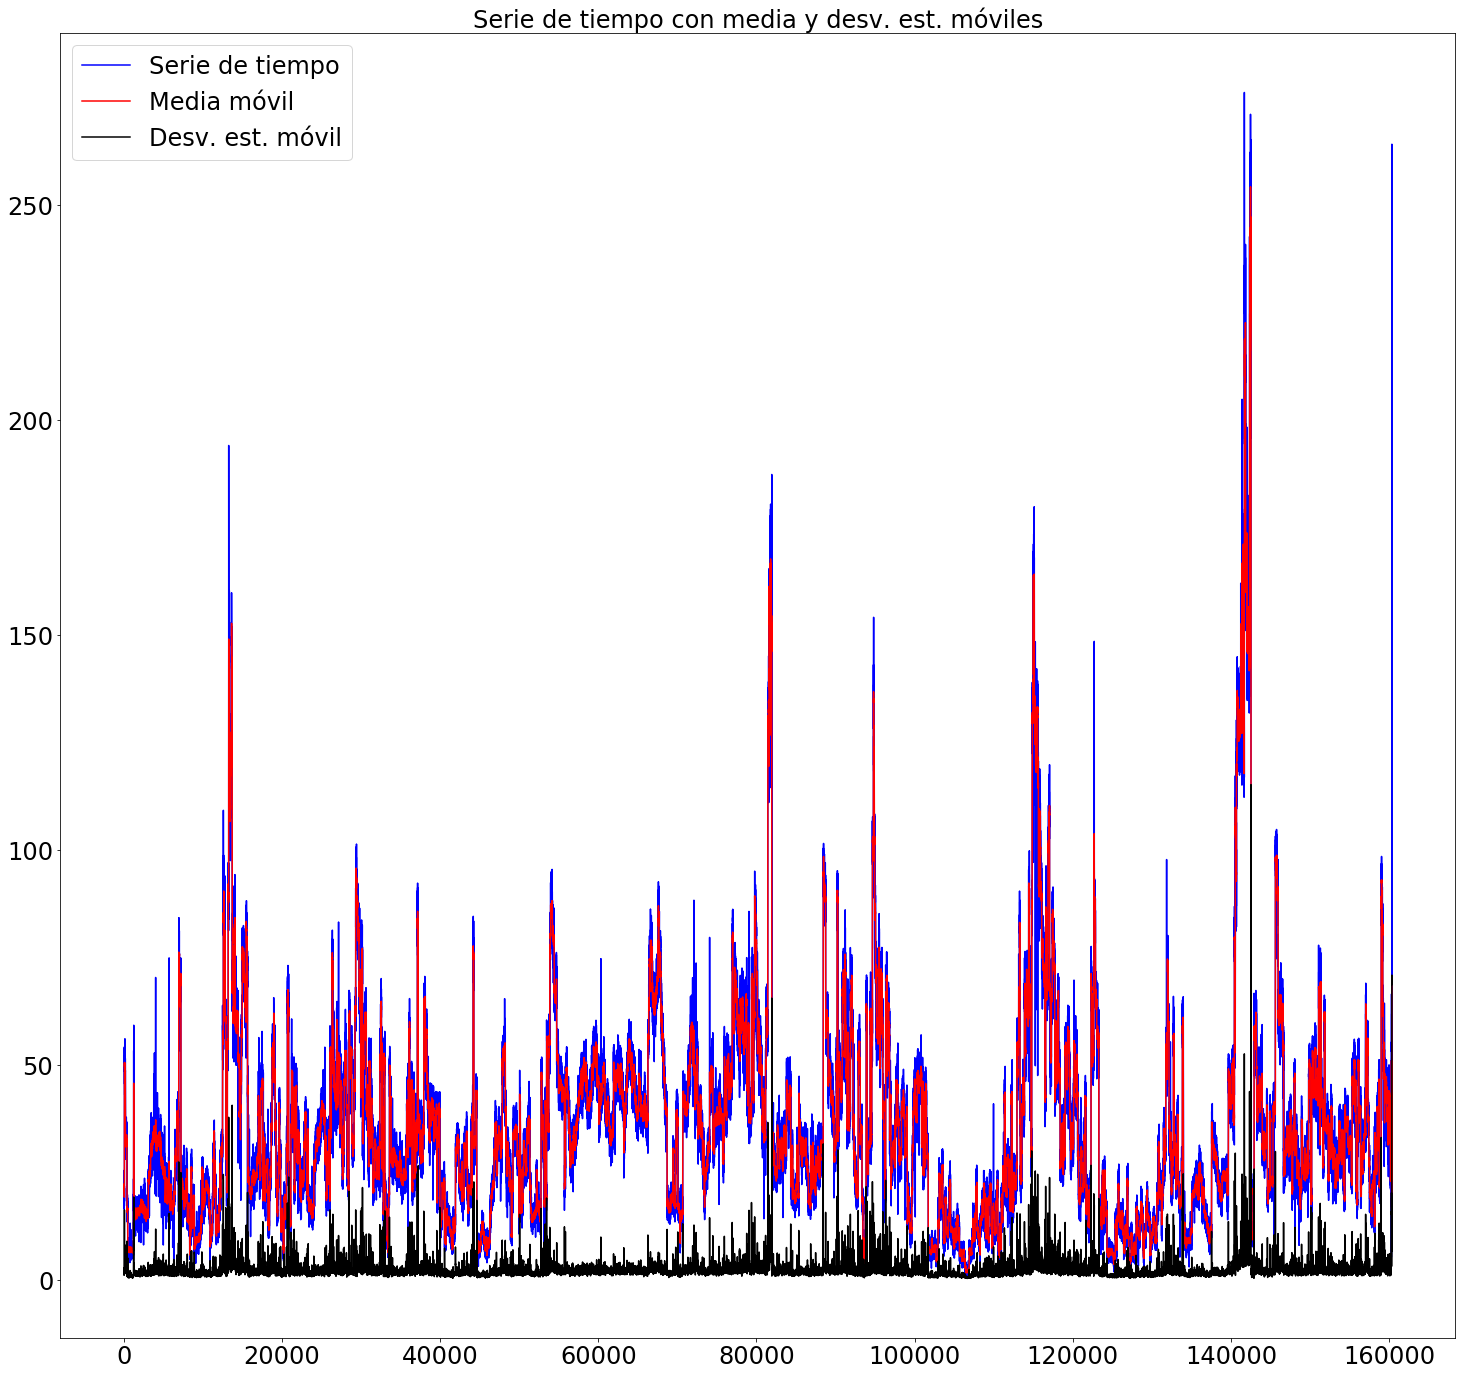

In [ ]:
test_stationarity(ts)

In [27]:
from statsmodels.tsa.stattools import periodogram
from numpy.fft import fft, fftfreq, rfft, rfftfreq
from scipy import signal
from scipy.fftpack import rfft 

X= rfft(ts)

#new_X = np.delete(X, slice(0,4000),0)

plt.subplot(3,1,1)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.title('Fast Fourier Transform'+instr+obj, fontsize=24)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Amplitude', fontsize=24)
plt.plot(X, '-')

plt.subplot(3,1,2)
plt.title('Periodogram'+instr+obj, fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
f, Pxx_den = signal.periodogram(X)
plt.plot(Pxx_den)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('PSD', fontsize=24)

plt.subplot(3,1,3)
plt.title('Periodogram (log)'+instr+obj, fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
psd = np.abs(rfft(X))**2
freqs = rfftfreq(2*len(X)-1,d=0.01)
plt.loglog(freqs,psd,'-')
plt.xlabel("Frecuencia", fontsize=16)
plt.ylabel("PSD", fontsize=24)
plt.xlabel('Time', fontsize=24)
#plt.savefig("images/"+path+obj+"_psd.png")
plt.show()


NameError: name 'ts' is not defined

In [62]:
freqs.shape

(4118,)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import pandas as pd

# Import csv file
df = pd.DataFrame(ts_EWM)
#df = pd.read_csv('rsam_2016-17_fft_test.csv', index_col=['DateTime'], parse_dates=['DateTime'])
#print(df.head())

#plot data
plt.figure(figsize=(12,4))
#df.plot(linestyle = '', marker = '*', color='r')
#plt.savefig('rsam_2016_2017_snippetforfft.jpg')
#plt.show()

#FFT
#number of sample points
N = 820
#frequency of signal (in days)
T = 1
#create x-axis for time length of signal
#x = np.linspace(0, N*T, N)
#create array that corresponds to values in signal
y = df
#perform FFT on signal
yf = rfft(y)
#create new x-axis: frequency from signal
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#plot results
plt.plot(xf, yf[0:N//2], label = 'signal')
plt.grid()
plt.xlabel('Frequency (days)')
plt.ylabel(r'Spectral Amplitude')
plt.legend(loc=1)
#plt.savefig('rsam_2016_2017_snippet_fft_firstresult.jpg')
#plt.savefig("images/"+path+obj+"_senal.png")
transf = np.abs(rfft(ts_EWM))
#psd = np.abs(rfft(ts_EWM))**2
freqs = rfftfreq(2*len(ts_EWM)-1,d=1)
#plt.loglog(freqs[12:410],transf[12:410],'.-')
plt.plot(transf[5:30],'.-')plt.show()

SyntaxError: invalid syntax (<ipython-input-29-0e8512b8b1be>, line 42)

In [ ]:
#luz="radio"#luz="radio"